# Codigo DATA MINING - PARTE 1 - EXPLORACIÓN Y PREPROCESAMIENTO

#Fuente de los datos:
- Medio: Kaggle
- user: Pralabh Poudel ·
- URL: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption
- Tema: World Energy Consumption
- link_diccionario: https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv

In [549]:
#cargamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#estándarizadores
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#colocar predeterminado los resultados numéricos en 2 decimales
pd.set_option('display.float_format','{:.2f}'.format)
from scipy.stats import normaltest
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [550]:
#cargado de datos
df=pd.read_excel('World Energy Consumption.xlsx')
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.00,22715353088.00,NaN,NaN,NaN,NaN,25.91,...,0.22,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
22008,Zimbabwe,2019,ZWE,15354606.00,NaN,NaN,NaN,NaN,NaN,24.75,...,0.36,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
22009,Zimbabwe,2020,ZWE,15669663.00,NaN,NaN,NaN,NaN,NaN,22.34,...,0.40,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
22010,Zimbabwe,2021,ZWE,15993525.00,NaN,NaN,NaN,NaN,NaN,23.76,...,0.50,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN


# Análisis exploratorio


In [551]:
#Estadisticas principales:
df.describe()

,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,18165.00,11113.00,1747.00,2687.00,2302.00,2767.00,5275.00,5527.00,5492.00,2671.00,...,6849.00,4035.00,2413.00,4639.00,4744.00,7065.00,7996.00,4065.00,6886.00,4101.00
mean,105066129.38,358511408959.19,46.09,2.72,133.56,38.07,64.72,10.97,1.95,0.42,...,0.62,0.21,267.54,7.31,53.42,62.81,17.56,232.11,1.40,0.65
std,463536833.18,2411179450271.07,274.62,10.06,264.71,111.62,201.04,47.95,5.27,0.82,...,2.07,0.64,5940.94,37.33,273.26,252.73,101.69,733.84,4.49,1.89
min,1833.00,164206000.00,-100.00,-50.84,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,-100.00,-51.21,0.00,0.00,0.00,0.00,0.00,0.00
25%,1674942.00,13658978304.00,-0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,4.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6953975.00,41674108928.00,8.18,0.00,15.48,0.67,0.15,0.01,0.06,0.06,...,0.00,0.00,20.00,0.00,0.01,0.00,0.00,0.05,0.00,0.00
75%,25501944.00,174429519872.00,26.51,0.86,165.27,13.63,34.29,0.69,1.58,0.56,...,0.10,0.02,47.97,0.32,2.36,2.10,0.14,45.52,0.37,0.27
max,7975105024.00,113630171365376.00,5659.33,141.13,2588.51,1199.21,2514.10,677.57,71.43,7.49,...,40.00,7.59,242384.84,665.41,5487.60,3219.85,2139.23,8422.01,56.84,26.16


In [610]:
#Verificamos los duplicados, nulos y atipicos
#número de duplicados
df.duplicated().sum()
# no hay presencia de duplicados
#Procentaje de nulos
print(f'Porcentaje de nulos \n{df.isnull().sum().sum() / df.size * 100}')
#verificación de nulos por columna
print(f' cantidad de nulos por columnas \n {df.isna().sum()}\n')
#verificación de nulos por filas
print(f'cantidad de filas al menos un nulo \n{(df.isna().any(axis=1)).sum()}')
#verificación de filas con alta proporción de nulos
print(f'cantidad de filas con un más del 50% del \n{(((df.isna().sum(axis=1))/df.shape[1])>0.5).sum()}')

Porcentaje de nulos 
68.34951113745664
 cantidad de nulos por columnas 
 country                       0
year                          0
iso_code                   5458
population                 3847
gdp                       10857
                          ...  
wind_elec_per_capita      14905
wind_electricity          13974
wind_energy_per_capita    17905
wind_share_elec           15084
wind_share_energy         17869
Length: 129, dtype: int64

cantidad de filas al menos un nulo 
21776
cantidad de filas con un más del 50% del 
15706


In [618]:
# Calcular skewness y kurtosis
df.select_dtypes(include='number').skew()

population                 8.95
gdp                       33.30
biofuel_cons_change_pct   14.39
biofuel_cons_change_twh    4.51
biofuel_cons_per_capita    3.91
                           ... 
wind_elec_per_capita       6.83
wind_electricity           9.71
wind_energy_per_capita     5.30
wind_share_elec            6.26
wind_share_energy          5.66
Length: 126, dtype: float64

In [620]:
df.select_dtypes(include='number').kurt()

population                 102.45
gdp                       1393.78
biofuel_cons_change_pct    250.39
biofuel_cons_change_twh     34.33
biofuel_cons_per_capita     22.09
                            ...  
wind_elec_per_capita        58.16
wind_electricity           124.50
wind_energy_per_capita      35.78
wind_share_elec             51.91
wind_share_energy           44.90
Length: 126, dtype: float64

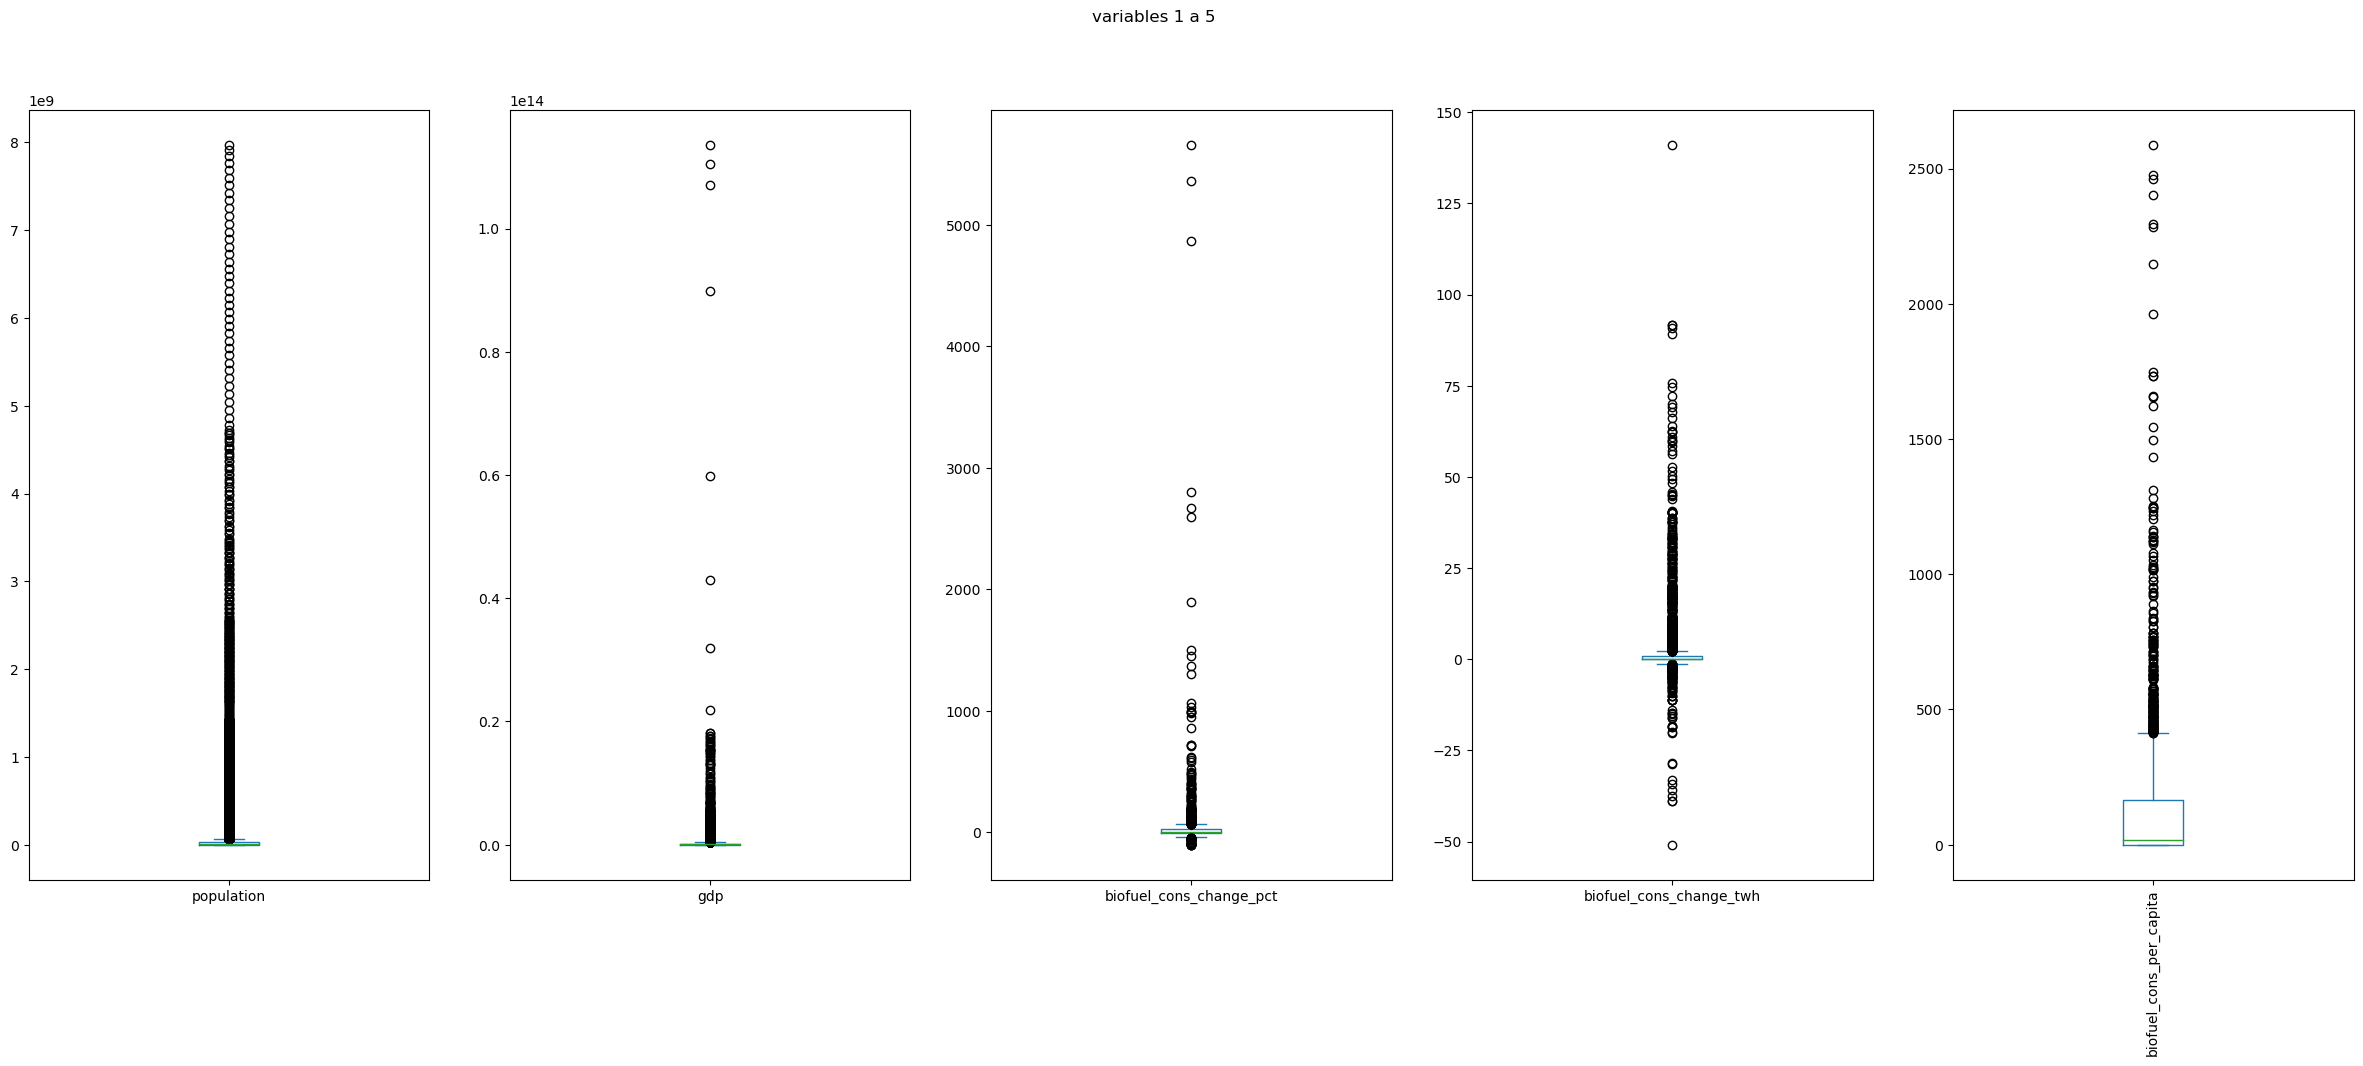

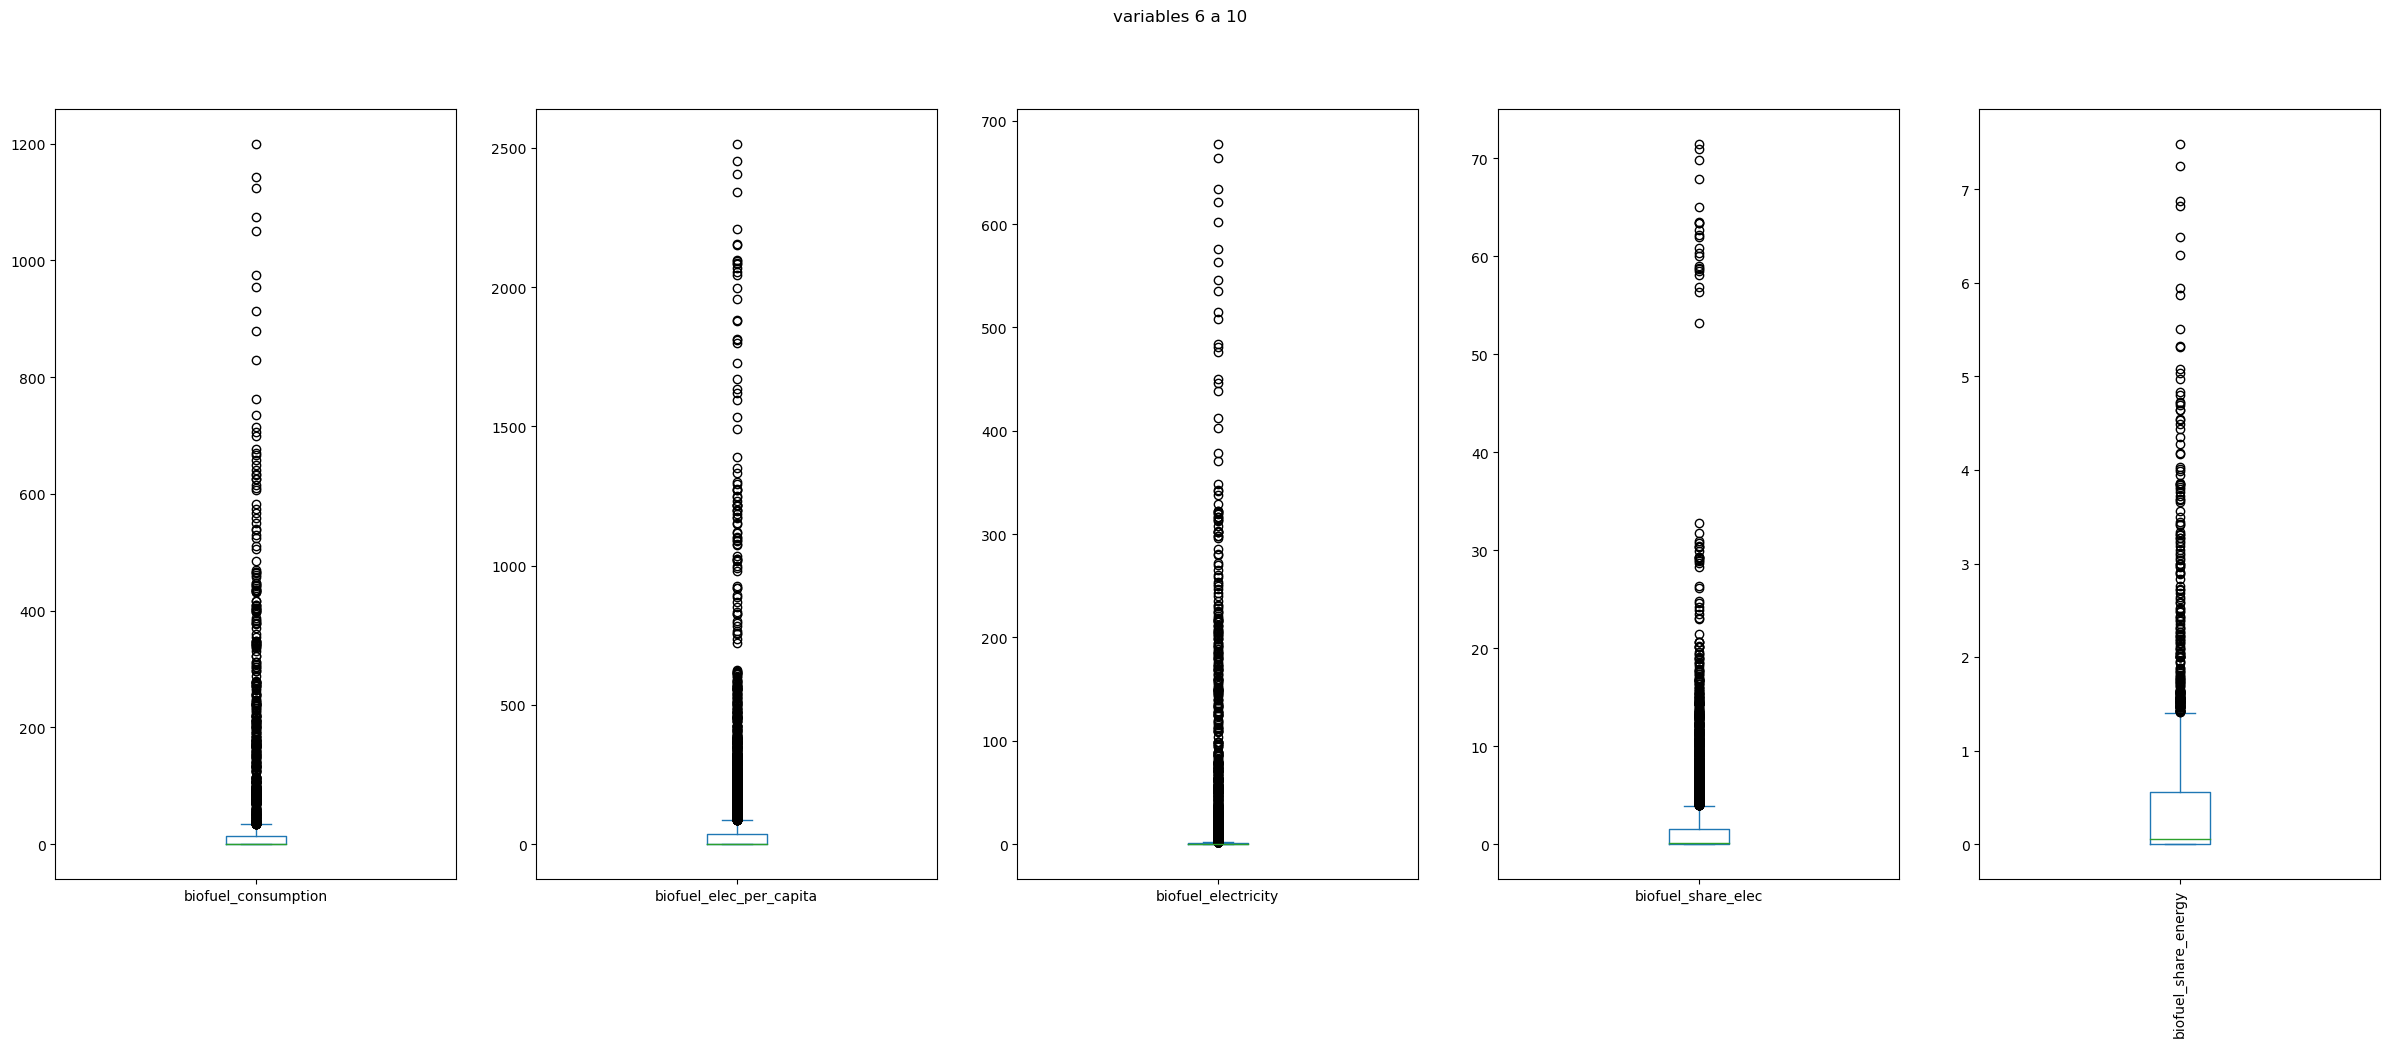

In [598]:
# verificamos las distribuciones de los datos

#columnas numéricas
num_cols=df.select_dtypes(include='number').columns
# Seleccionar solo las primeras 10
num_cols_10 = num_cols[:10]
# tamaño de la lote
batch_size=5

for i in range(0,len(num_cols_10),batch_size):
    cols_batch=num_cols_10[i:i+batch_size]
    df[cols_batch].plot(
        kind='box',subplots=True,layout=(1,batch_size), 
        figsize=(30,10), sharex=False
    )
    plt.suptitle(f'variables {i+1} a {i+len(cols_batch)}')
    plt.xticks(rotation=90)
    plt.show()

# Preprocesamiento
## Eliminación de Inconsistencias

In [553]:
df['year'].dtype

dtype('O')

In [555]:
df.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, ' Chile'], dtype=object)

In [556]:
#df['year']=np.where(df['year']==' Chile','',df['year'])

In [557]:
#El valor ' Chile' mezclado en la columna year indica un error 
#Se descartó un desplazamiento de columnas
#Se elimina year=Chile
df = df[df['year'] != ' Chile']
df.sort_values(by="year")

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
9904,Italy,1900,ITA,33332371.00,109905412096.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13091,Netherlands,1900,NLD,5140189.00,27283451904.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6562,Europe,1900,NaN,406610221.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9289,Indonesia,1900,IDN,38179623.00,51910098944.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12196,Middle East (Shift),1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17635,Singapore,2022,SGP,5975689.00,NaN,NaN,NaN,NaN,NaN,63.59,...,1.72,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN
10884,Libya,2022,LBY,6812344.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10922,Lithuania,2022,LTU,2750058.00,NaN,-10.08,-0.15,481.71,1.32,236.36,...,10.31,0.84,11.05,0.38,3.94,578.17,1.59,1433.58,38.13,6.19
10597,Latin America and Caribbean (Ember),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,NaN,NaN,137.07,NaN,7.74,NaN


## Manejo de valores nulos:

In [558]:
df.isna().sum()

country                       0
year                          0
iso_code                   5458
population                 3847
gdp                       10857
                          ...  
wind_elec_per_capita      14905
wind_electricity          13974
wind_energy_per_capita    17905
wind_share_elec           15084
wind_share_energy         17869
Length: 129, dtype: int64

In [559]:
#crear un df de copia para procedimientos
df_copy = df.copy()

#Convertir año a categórico
df_copy["year"] = df_copy["year"].astype(str)

# Buscar columnas con palabra clave relacionadas a energía. 
# Para automatizar la imputación sin tener que escribir columna por columna.
energy_cols = [
    c for c in df_copy.columns
    if any(x in c for x in [
        "coal_", "gas_", "oil_", "biofuel_", "solar_", "wind_",
        "hydro_", "renewable", "electricity", "consumption",
        "production", "elec", "share", "twh"
    ])
]

df_copy = df_copy.sort_values(["country", "year"])

# Imputación mediante interpolación lineal dentro de cada país para las variables de energía
# Estima un valor intermedio cuando hay años previos y posteriores con datos.

for col in energy_cols:
    if df_copy[col].dtype != "O":
        df_copy[col] = (
            df_copy.groupby("country")[col]
              .transform(lambda s: s.interpolate(method="linear",
                                                 limit_direction="both"))
        )


In [560]:
# Imputación por propagación:

# imputación de población por país:
# La población no cambia de forma brusca año a año
#ffill (forward fill): rellena hacia adelante
#bfill (backward fill): rellena hacia atrás si aún queda un nulo

df_copy["population"] = (
    df_copy.sort_values("year")
      .groupby("country")["population"]
      .transform(lambda s: s.fillna(method="ffill").fillna(method="bfill"))
)


# Imputación de variables relacionadas al PBI
# Mismo método de imputacion con ffill y bfill
gdp_cols = [c for c in df_copy.columns if "gdp" in c.lower()]

for col in gdp_cols:
    df_copy[col] = (
        df_copy.sort_values("year")
          .groupby("country")[col]
          .transform(lambda s: s.fillna(method="ffill").fillna(method="bfill"))
    )

In [561]:
df_copy.isna().sum()

country                       0
year                          0
iso_code                   5458
population                 3681
gdp                        7465
                          ...  
wind_elec_per_capita       4048
wind_electricity           3042
wind_energy_per_capita    12404
wind_share_elec            3331
wind_share_energy         12077
Length: 129, dtype: int64

In [562]:
# Filtrar desde el año 2000
df_filtrada = df_copy[df_copy["year"] >= '2000'].reset_index(drop=True)

print(df_filtrada.isnull().sum())

country                      0
year                         0
iso_code                  1731
population                1427
gdp                       2863
                          ... 
wind_elec_per_capita      1521
wind_electricity           970
wind_energy_per_capita    4546
wind_share_elec           1079
wind_share_energy         4339
Length: 129, dtype: int64


In [563]:
df_filtrada.sort_values(by="year")

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
3207,Liberia,2000,LBR,2895229.00,2767093248.00,NaN,NaN,NaN,NaN,0.00,...,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
5196,Saint Lucia,2000,LCA,159513.00,1100265088.00,NaN,NaN,NaN,NaN,0.00,...,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
3229,Libya,2000,LBY,5154789.00,49983479808.00,NaN,NaN,NaN,NaN,0.00,...,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
644,Belgium,2000,BEL,10264351.00,345736773632.00,171.25,0.00,0.00,0.00,55.53,...,0.00,0.00,23.08,0.01,0.05,1.95,0.02,4.61,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,Non-OPEC (EI),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358,Costa Rica,2022,CRI,5180836.00,73336987648.00,NaN,NaN,NaN,NaN,3.86,...,0.47,NaN,NaN,NaN,NaN,262.51,1.36,NaN,10.77,NaN
4229,North America,2022,NaN,600323657.00,NaN,3.83,17.09,772.18,463.56,131.50,...,4.14,1.81,13.43,149.95,1301.69,831.69,499.28,2168.32,8.86,3.88
3740,Moldova,2022,MDA,3272993.00,23299414016.00,NaN,NaN,NaN,NaN,3.06,...,0.19,NaN,NaN,NaN,NaN,24.44,0.08,NaN,1.49,NaN


In [564]:
# Crea un diccionario iso_code -> country (Solo donde country no es nulo)
iso_to_country = (
    df_filtrada.loc[df_filtrada["country"].notna(), ["iso_code", "country"]]
           .drop_duplicates()
           .set_index("iso_code")["country"]
           .to_dict()
)

# Rellena valores faltantes en country según iso_code
df_filtrada["country"] = df_filtrada.apply(
    lambda row: iso_to_country[row["iso_code"]]
                if pd.isna(row["country"]) and row["iso_code"] in iso_to_country
                else row["country"],
    axis=1
)

In [565]:
# Selecciona columnas ≤ 30% de nulos 
# para mantener solo variables con nivel aceptable de completitud
df_final= df_filtrada.copy()

porcentaje_nulos = df_final.isnull().mean()
cols_validas = df_final.columns[porcentaje_nulos <= 0.30] 
df_final = df_final[cols_validas]
df_final

,country,year,iso_code,population,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,carbon_intensity_elec,coal_elec_per_capita,coal_electricity,...,primary_energy_consumption,renewables_elec_per_capita,renewables_electricity,renewables_share_elec,solar_elec_per_capita,solar_electricity,solar_share_elec,wind_elec_per_capita,wind_electricity,wind_share_elec
0,ASEAN (Ember),2000,NaN,NaN,NaN,5.60,1.52,500.23,NaN,71.03,...,NaN,NaN,72.90,19.77,NaN,0.00,0.00,NaN,0.00,0.00
1,ASEAN (Ember),2001,NaN,NaN,NaN,6.02,1.52,499.36,NaN,80.02,...,NaN,NaN,76.68,19.31,NaN,0.00,0.00,NaN,0.00,0.00
2,ASEAN (Ember),2002,NaN,NaN,NaN,6.06,1.43,505.65,NaN,87.16,...,NaN,NaN,75.99,17.97,NaN,0.00,0.00,NaN,0.00,0.00
3,ASEAN (Ember),2003,NaN,NaN,NaN,6.69,1.50,513.70,NaN,98.51,...,NaN,NaN,75.71,16.93,NaN,0.00,0.00,NaN,0.00,0.00
4,ASEAN (Ember),2004,NaN,NaN,NaN,7.57,1.56,520.91,NaN,111.62,...,NaN,NaN,77.02,15.88,NaN,0.00,0.00,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632,Zimbabwe,2018,ZWE,15052191.00,25.91,0.39,4.24,355.82,245.15,3.69,...,51.81,362.74,5.46,59.41,1.33,0.02,0.22,0.00,0.00,0.00
6633,Zimbabwe,2019,ZWE,15354606.00,24.75,0.38,4.61,387.14,235.76,3.62,...,46.12,298.28,4.58,55.58,1.95,0.03,0.36,0.00,0.00,0.00
6634,Zimbabwe,2020,ZWE,15669663.00,22.34,0.35,4.61,389.99,214.43,3.36,...,42.00,267.40,4.19,55.20,1.92,0.03,0.40,0.00,0.00,0.00
6635,Zimbabwe,2021,ZWE,15993525.00,23.76,0.38,4.73,392.28,223.22,3.57,...,42.15,276.36,4.42,55.04,2.50,0.04,0.50,0.00,0.00,0.00


In [566]:
df_final.isna().sum()

country                       0
year                          0
iso_code                   1731
population                 1427
biofuel_elec_per_capita    1631
                           ... 
solar_electricity           970
solar_share_elec           1079
wind_elec_per_capita       1521
wind_electricity            970
wind_share_elec            1079
Length: 63, dtype: int64

In [567]:
df_final.dropna(inplace=True)

In [568]:
df_final

,country,year,iso_code,population,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,carbon_intensity_elec,coal_elec_per_capita,coal_electricity,...,primary_energy_consumption,renewables_elec_per_capita,renewables_electricity,renewables_share_elec,solar_elec_per_capita,solar_electricity,solar_share_elec,wind_elec_per_capita,wind_electricity,wind_share_elec
23,Afghanistan,2000,AFG,19542986.00,0.00,0.00,0.00,255.32,0.00,0.00,...,5.91,15.86,0.31,65.96,0.00,0.00,0.00,0.00,0.00,0.00
24,Afghanistan,2001,AFG,19688634.00,0.00,0.00,0.00,118.64,0.00,0.00,...,4.66,25.39,0.50,84.75,0.00,0.00,0.00,0.00,0.00,0.00
25,Afghanistan,2002,AFG,21000258.00,0.00,0.00,0.00,144.93,0.00,0.00,...,4.43,26.67,0.56,81.16,0.00,0.00,0.00,0.00,0.00,0.00
26,Afghanistan,2003,AFG,22645136.00,0.00,0.00,0.00,255.32,0.00,0.00,...,5.21,27.82,0.63,67.02,0.00,0.00,0.00,0.00,0.00,0.00
27,Afghanistan,2004,AFG,23553554.00,0.00,0.00,0.00,269.66,0.00,0.00,...,4.81,23.78,0.56,62.92,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Zimbabwe,2017,ZWE,14751101.00,21.69,0.32,4.35,363.26,204.73,3.02,...,45.26,291.50,4.30,58.50,0.68,0.01,0.14,0.00,0.00,0.00
6632,Zimbabwe,2018,ZWE,15052191.00,25.91,0.39,4.24,355.82,245.15,3.69,...,51.81,362.74,5.46,59.41,1.33,0.02,0.22,0.00,0.00,0.00
6633,Zimbabwe,2019,ZWE,15354606.00,24.75,0.38,4.61,387.14,235.76,3.62,...,46.12,298.28,4.58,55.58,1.95,0.03,0.36,0.00,0.00,0.00
6634,Zimbabwe,2020,ZWE,15669663.00,22.34,0.35,4.61,389.99,214.43,3.36,...,42.00,267.40,4.19,55.20,1.92,0.03,0.40,0.00,0.00,0.00


In [569]:
#columnas de la data
df_final.columns

Index(['country', 'year', 'iso_code', 'population', 'biofuel_elec_per_capita',
       'biofuel_electricity', 'biofuel_share_elec', 'carbon_intensity_elec',
       'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_twh',
       'coal_prod_per_capita', 'coal_production', 'coal_share_elec',
       'electricity_demand', 'electricity_generation',
       'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita',
       'fossil_elec_per_capita', 'fossil_electricity', 'fossil_share_elec',
       'gas_elec_per_capita', 'gas_electricity', 'gas_prod_change_twh',
       'gas_prod_per_capita', 'gas_production', 'gas_share_elec',
       'greenhouse_gas_emissions', 'hydro_elec_per_capita',
       'hydro_electricity', 'hydro_share_elec', 'low_carbon_elec_per_capita',
       'low_carbon_electricity', 'low_carbon_share_elec', 'net_elec_imports',
       'net_elec_imports_share_demand', 'nuclear_elec_per_capita',
       'nuclear_electricity', 'nuclear_share_elec', 'oil_elec_per_ca

In [570]:
#tipos de dato de la data World Energy Consumption
print(df_final.dtypes)

print(f"\n cantidad de columnas categoricas {df_final.select_dtypes(include='object').shape[1]}")
print(f"\n cantidad de columnas numéricas {df_final.select_dtypes(include='number').shape[1]}")

country                     object
year                        object
iso_code                    object
population                 float64
biofuel_elec_per_capita    float64
                            ...   
solar_electricity          float64
solar_share_elec           float64
wind_elec_per_capita       float64
wind_electricity           float64
wind_share_elec            float64
Length: 63, dtype: object

 cantidad de columnas categoricas 3

 cantidad de columnas numéricas 60


In [571]:
df_final_seleccion=df_final.copy()

col_select=['country','year','electricity_demand','electricity_generation','fossil_electricity','gas_electricity','greenhouse_gas_emissions','hydro_electricity','low_carbon_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','renewables_electricity','solar_electricity','wind_electricity']

df_final_seleccion=df_final_seleccion[col_select]

In [572]:
df_transformado=df_final_seleccion.copy()

col_transform=['electricity_demand','electricity_generation','fossil_electricity','gas_electricity','greenhouse_gas_emissions','hydro_electricity','low_carbon_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','renewables_electricity','solar_electricity','wind_electricity']
for col in col_transform:
    df_transformado[f'{col}_per_capita']=0
    df_transformado.loc[:,f'{col}_per_capita']=df_final[col]/df_final['population']

df_transformado.drop(columns=col_transform, axis=1,inplace=True)


In [573]:
df_transformado

,country,year,electricity_demand_per_capita,electricity_generation_per_capita,fossil_electricity_per_capita,gas_electricity_per_capita,greenhouse_gas_emissions_per_capita,hydro_electricity_per_capita,low_carbon_electricity_per_capita,nuclear_electricity_per_capita,oil_electricity_per_capita,other_renewable_electricity_per_capita,renewables_electricity_per_capita,solar_electricity_per_capita,wind_electricity_per_capita
23,Afghanistan,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24,Afghanistan,2001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25,Afghanistan,2002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,Afghanistan,2003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
27,Afghanistan,2004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Zimbabwe,2017,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6632,Zimbabwe,2018,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6633,Zimbabwe,2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6634,Zimbabwe,2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


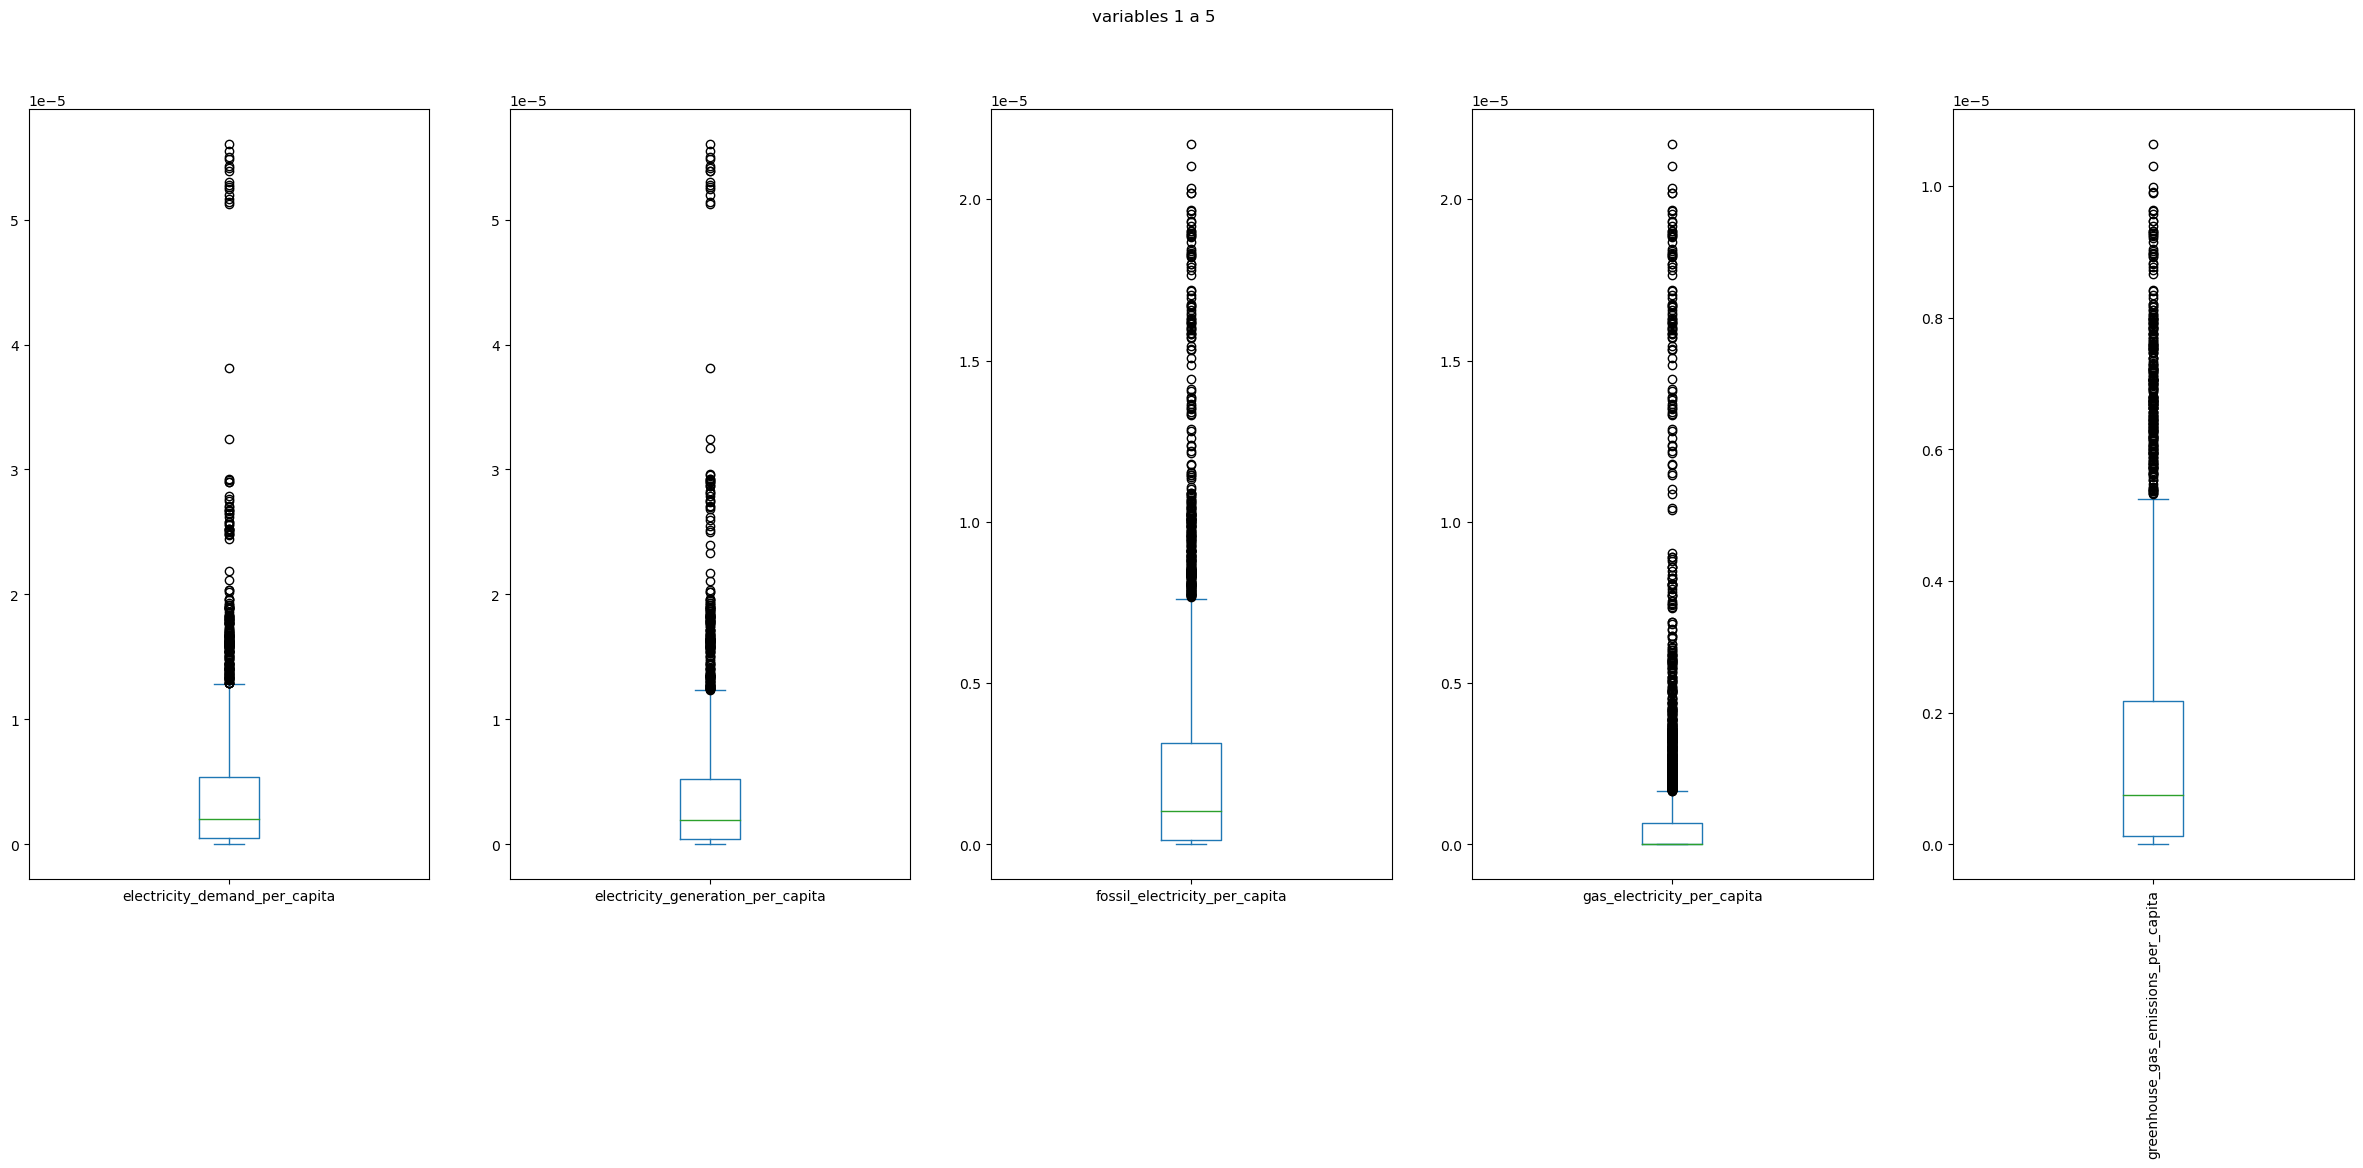

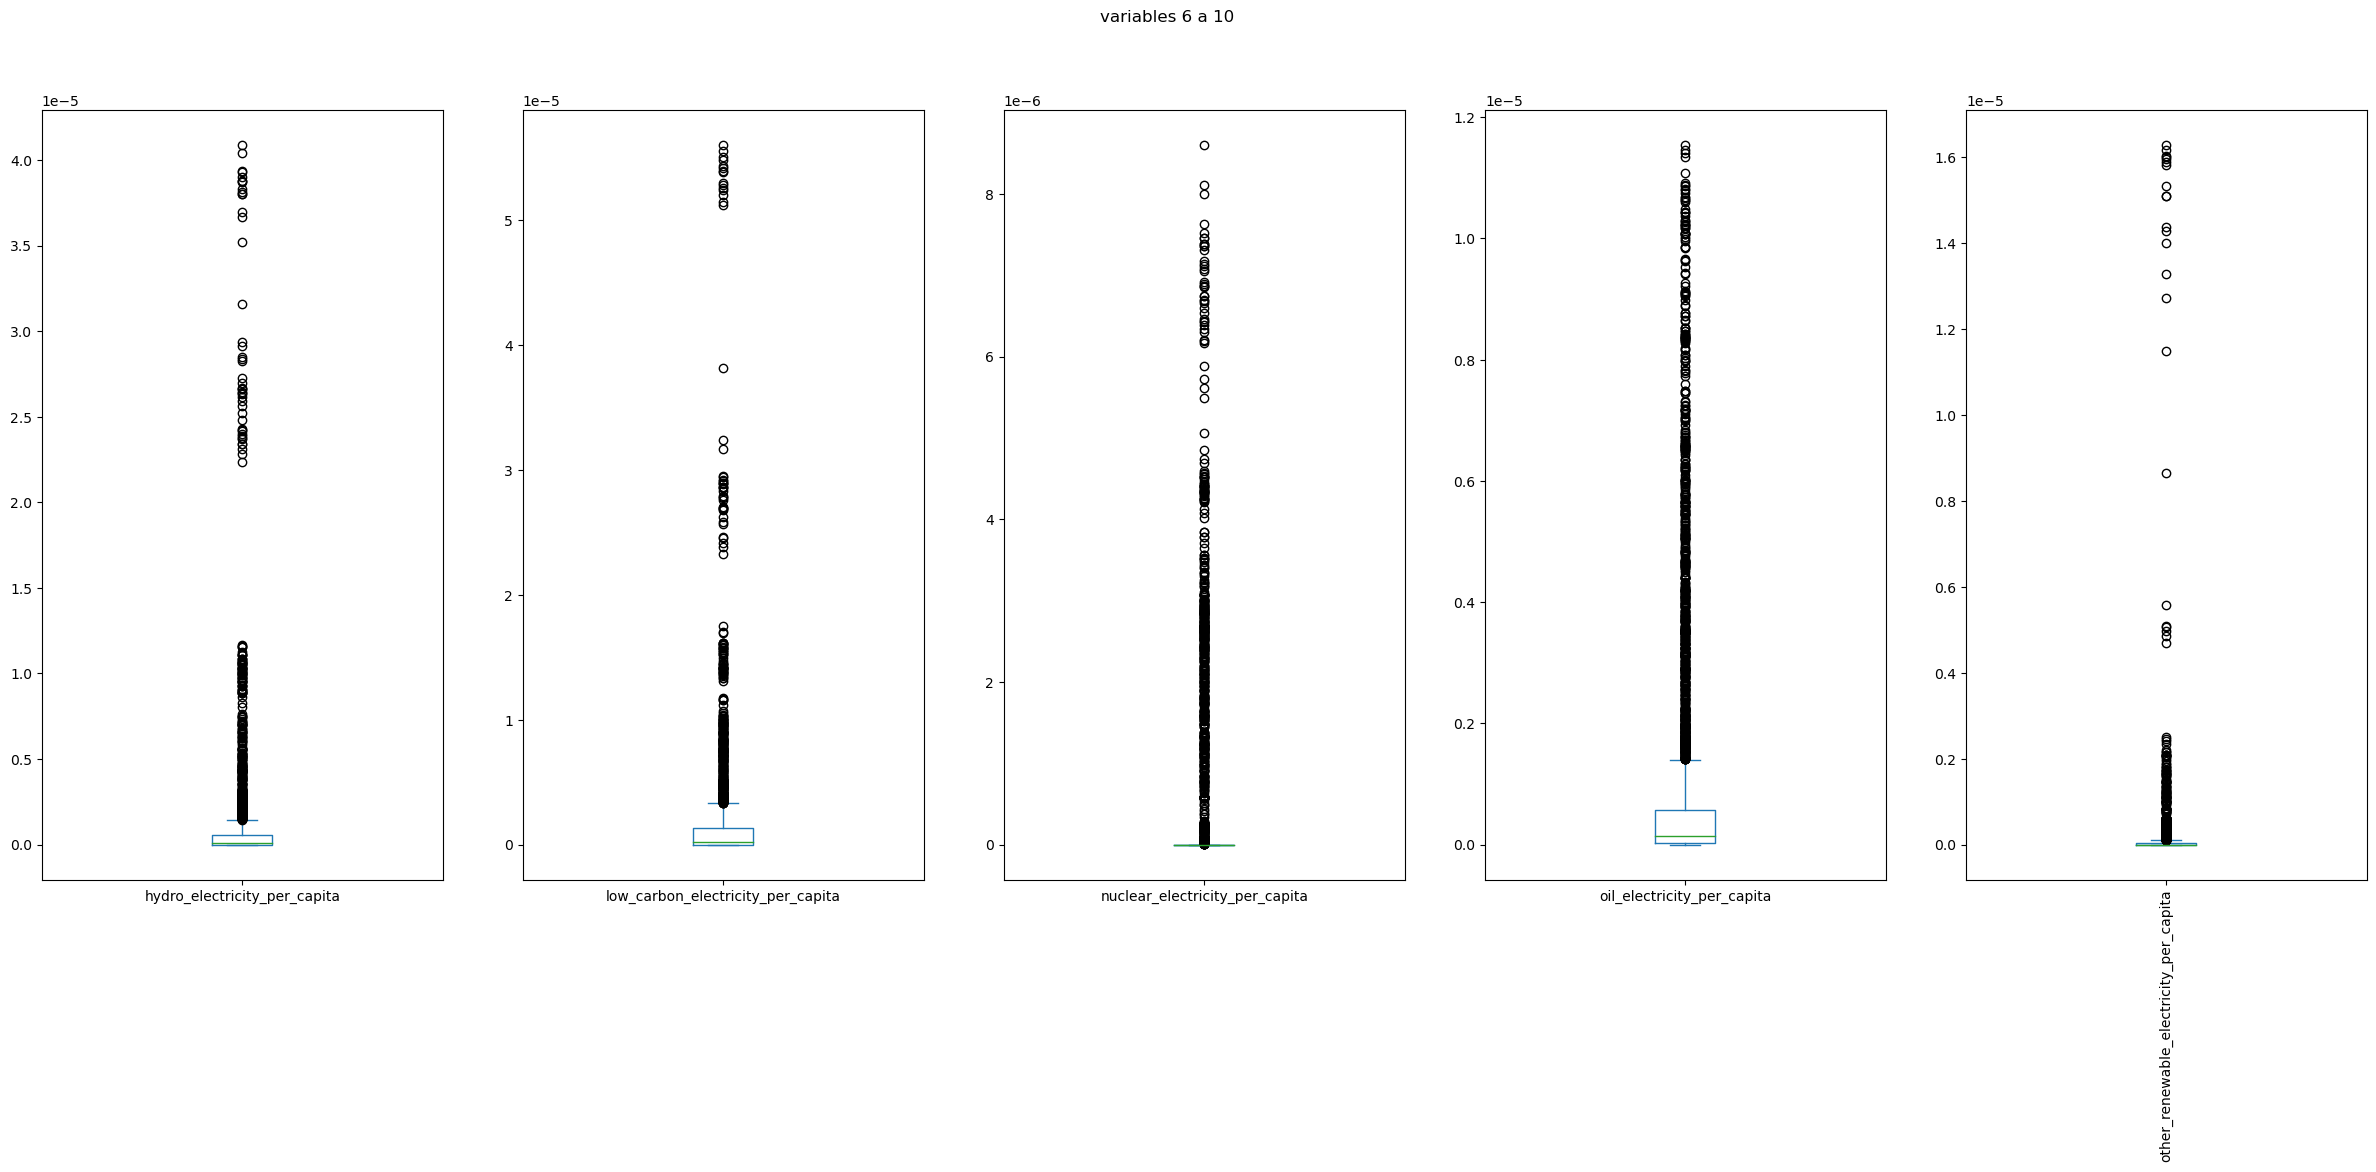

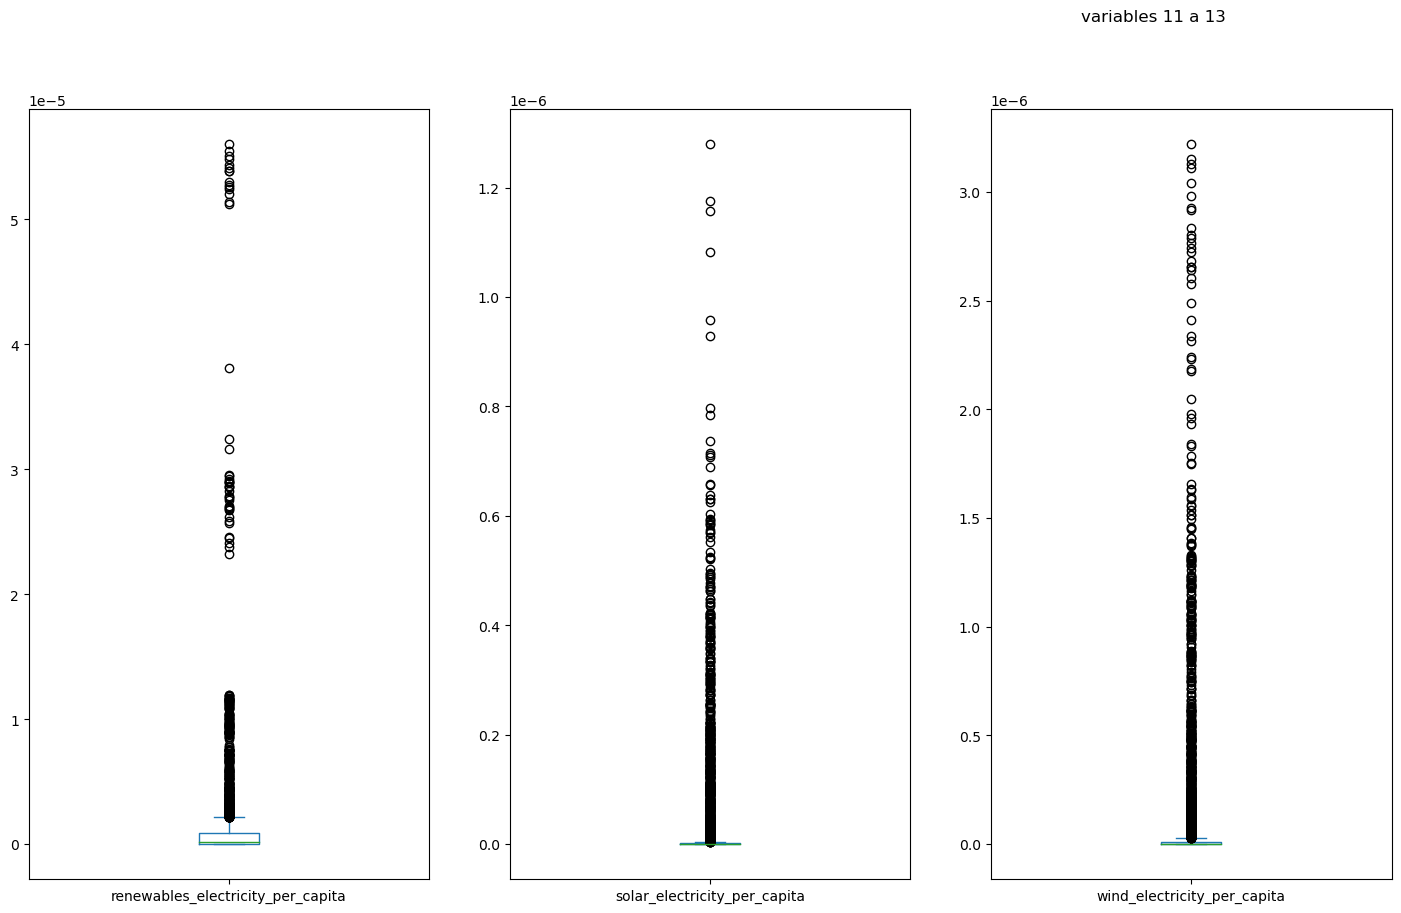

In [574]:
# verificamos las distribuciones de los datos

#columnas numéricas
num_cols=df_transformado.select_dtypes(include='number').columns
# tamaño de la lote
batch_size=5

for i in range(0,len(num_cols),batch_size):
    cols_batch=num_cols[i:i+batch_size]
    df_transformado[cols_batch].plot(kind='box',subplots=True,layout=(1,batch_size), figsize=(30,10), sharex=False)
    plt.suptitle(f'variables {i+1} a {i+len(cols_batch)}')
    plt.xticks(rotation=90)
    plt.show()

In [575]:
#altas asimetrías
df_transformado.select_dtypes(include='number').skew()
print(f"número de variables con alta asimetría {((df_transformado.select_dtypes(include='number').skew()>0.85)|(df_transformado.select_dtypes(include='number').skew()<-0.85)).sum()}")


número de variables con alta asimetría 11


In [576]:
#Verificamos los duplicados, nulos y atipicos
#número de duplicados
df_transformado.duplicated().sum()
df_transformado.drop_duplicates(inplace=True)
# no hay presencia de duplicados
#verificación de nulos por columna
print(f' cantidad de nulos por columnas \n {df_transformado.isna().sum()}\n')
#verificación de nulos por filas
print(f'cantidad de filas al menos un nulo \n{(df_transformado.isna().any(axis=1)).sum()}')
#verificación de filas con alta proporción de nulos
print(f'cantidad de filas con un más del 50% del \n{(((df_transformado.isna().sum(axis=1))/df_transformado.shape[1])>0.5).sum()}')

 cantidad de nulos por columnas 
 country                                   0
year                                      0
electricity_demand_per_capita             0
electricity_generation_per_capita         0
fossil_electricity_per_capita             0
gas_electricity_per_capita                0
greenhouse_gas_emissions_per_capita       0
hydro_electricity_per_capita              0
low_carbon_electricity_per_capita         0
nuclear_electricity_per_capita            0
oil_electricity_per_capita                0
other_renewable_electricity_per_capita    0
renewables_electricity_per_capita         0
solar_electricity_per_capita              0
wind_electricity_per_capita               0
dtype: int64

cantidad de filas al menos un nulo 
0
cantidad de filas con un más del 50% del 
0


In [577]:
df_final_seleccion.skew(numeric_only=True)

electricity_demand            10.41
electricity_generation        10.31
fossil_electricity            10.83
gas_electricity               10.87
greenhouse_gas_emissions      11.17
hydro_electricity              6.27
low_carbon_electricity         8.14
nuclear_electricity            8.99
oil_electricity                7.97
other_renewable_electricity    6.93
renewables_electricity         7.05
solar_electricity             16.68
wind_electricity              15.99
dtype: float64

## Outliers

In [579]:
num_cols = df_transformado.select_dtypes(include=[np.number]).columns

# Aplicar winsorizing manual usando 3*IQR
for col in num_cols:
    Q1 = df_transformado[col].quantile(0.25)
    Q3 = df_transformado[col].quantile(0.75)
    IQR = Q3 - Q1

    # se aplica 3 en vez de 1.5
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR

    # Winsorize (capar)
    df_transformado[col] = df_transformado[col].clip(lower, upper)

In [580]:
df_transformado

,country,year,electricity_demand_per_capita,electricity_generation_per_capita,fossil_electricity_per_capita,gas_electricity_per_capita,greenhouse_gas_emissions_per_capita,hydro_electricity_per_capita,low_carbon_electricity_per_capita,nuclear_electricity_per_capita,oil_electricity_per_capita,other_renewable_electricity_per_capita,renewables_electricity_per_capita,solar_electricity_per_capita,wind_electricity_per_capita
23,Afghanistan,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24,Afghanistan,2001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25,Afghanistan,2002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,Afghanistan,2003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
27,Afghanistan,2004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Zimbabwe,2017,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6632,Zimbabwe,2018,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6633,Zimbabwe,2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6634,Zimbabwe,2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


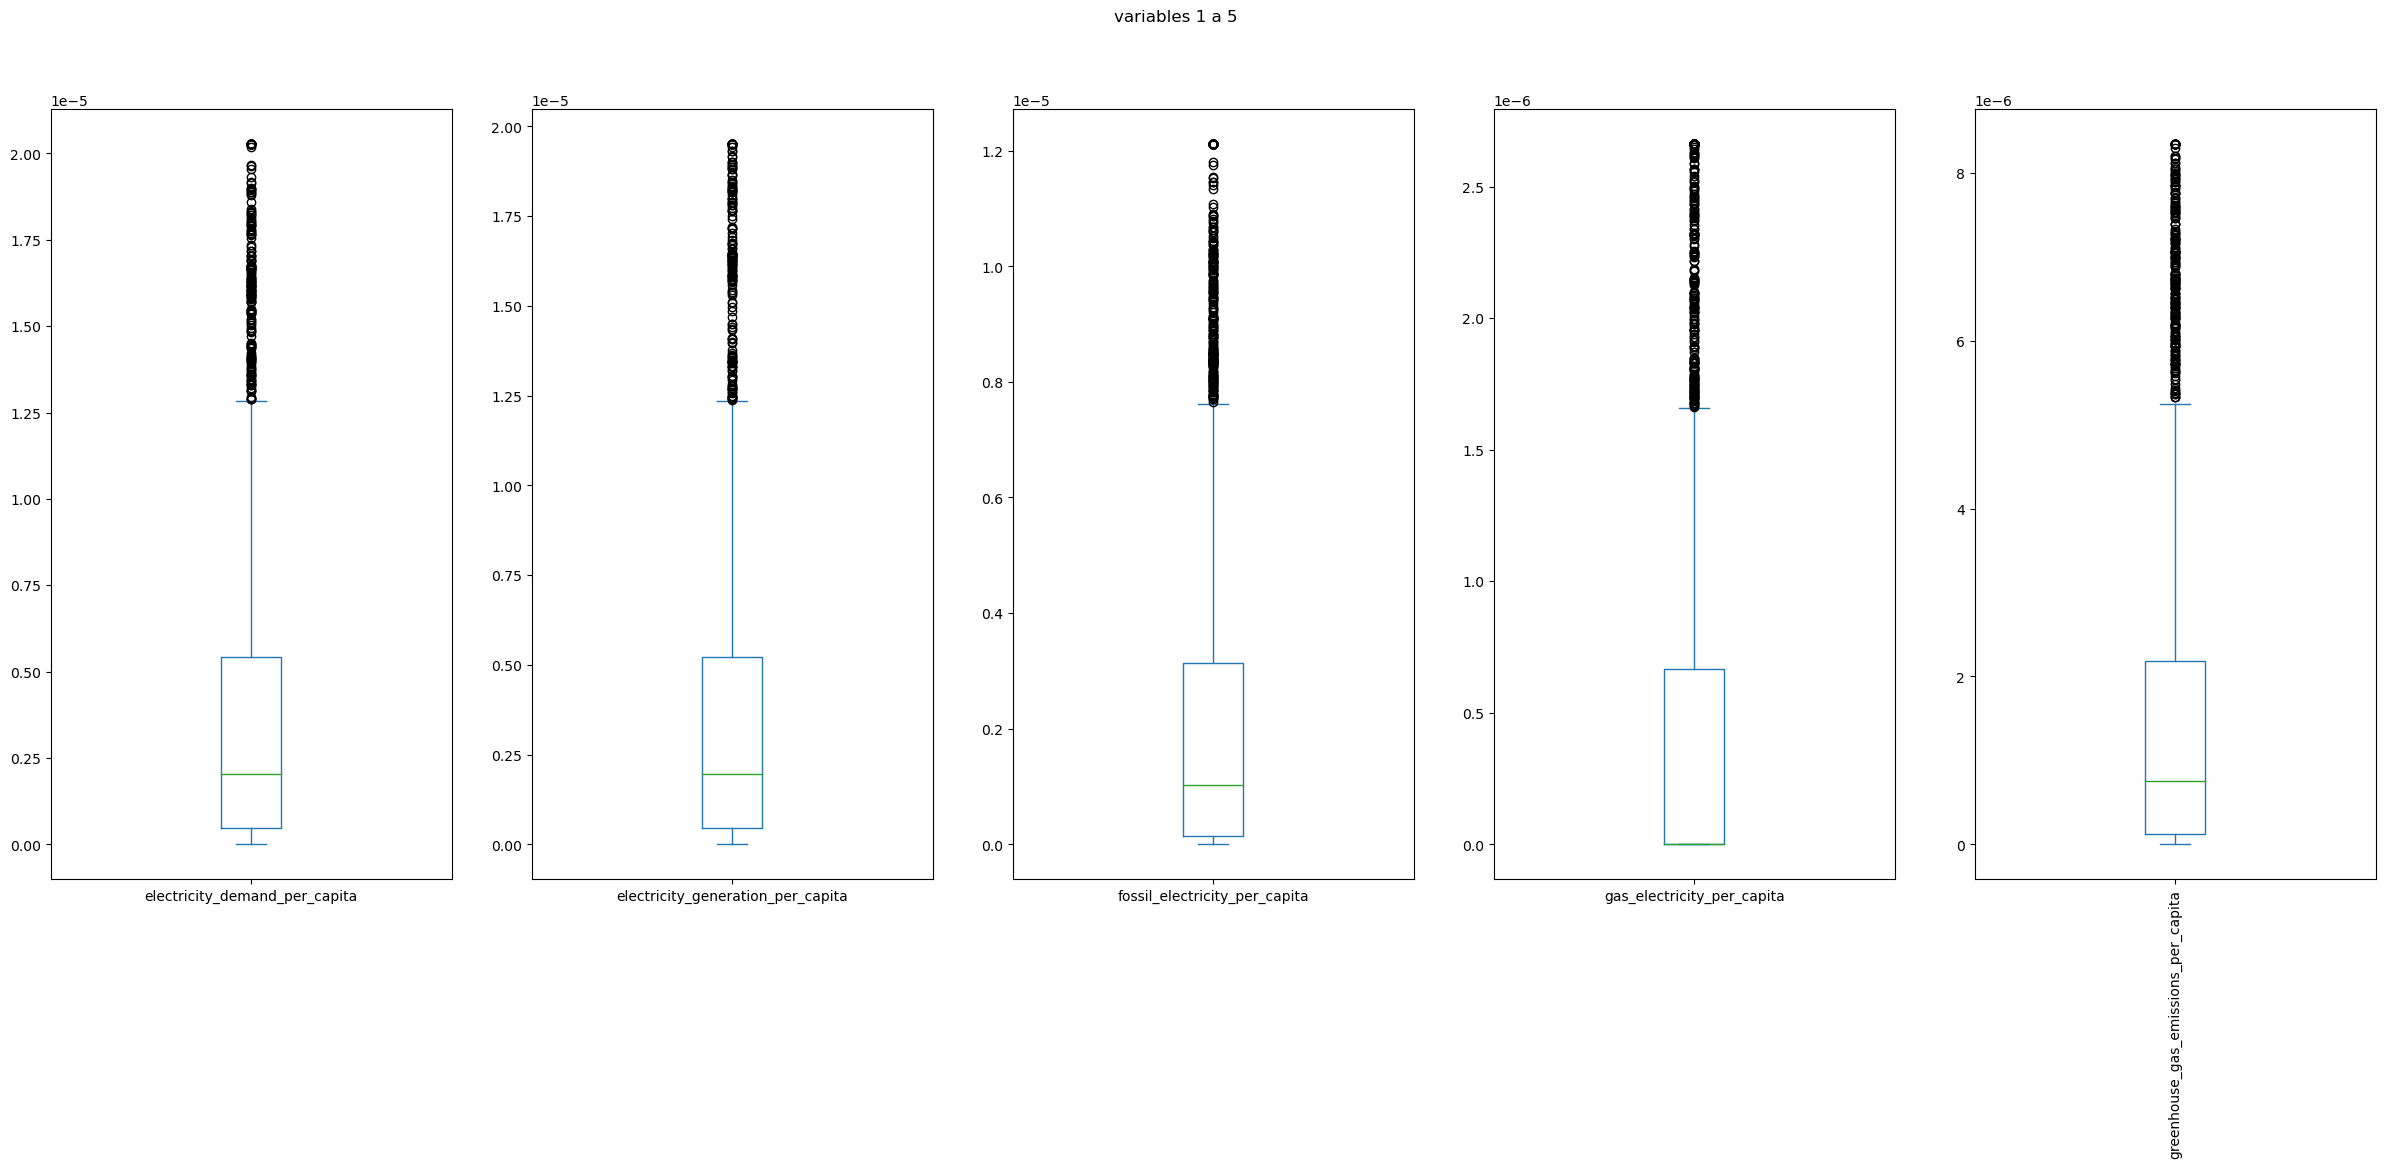

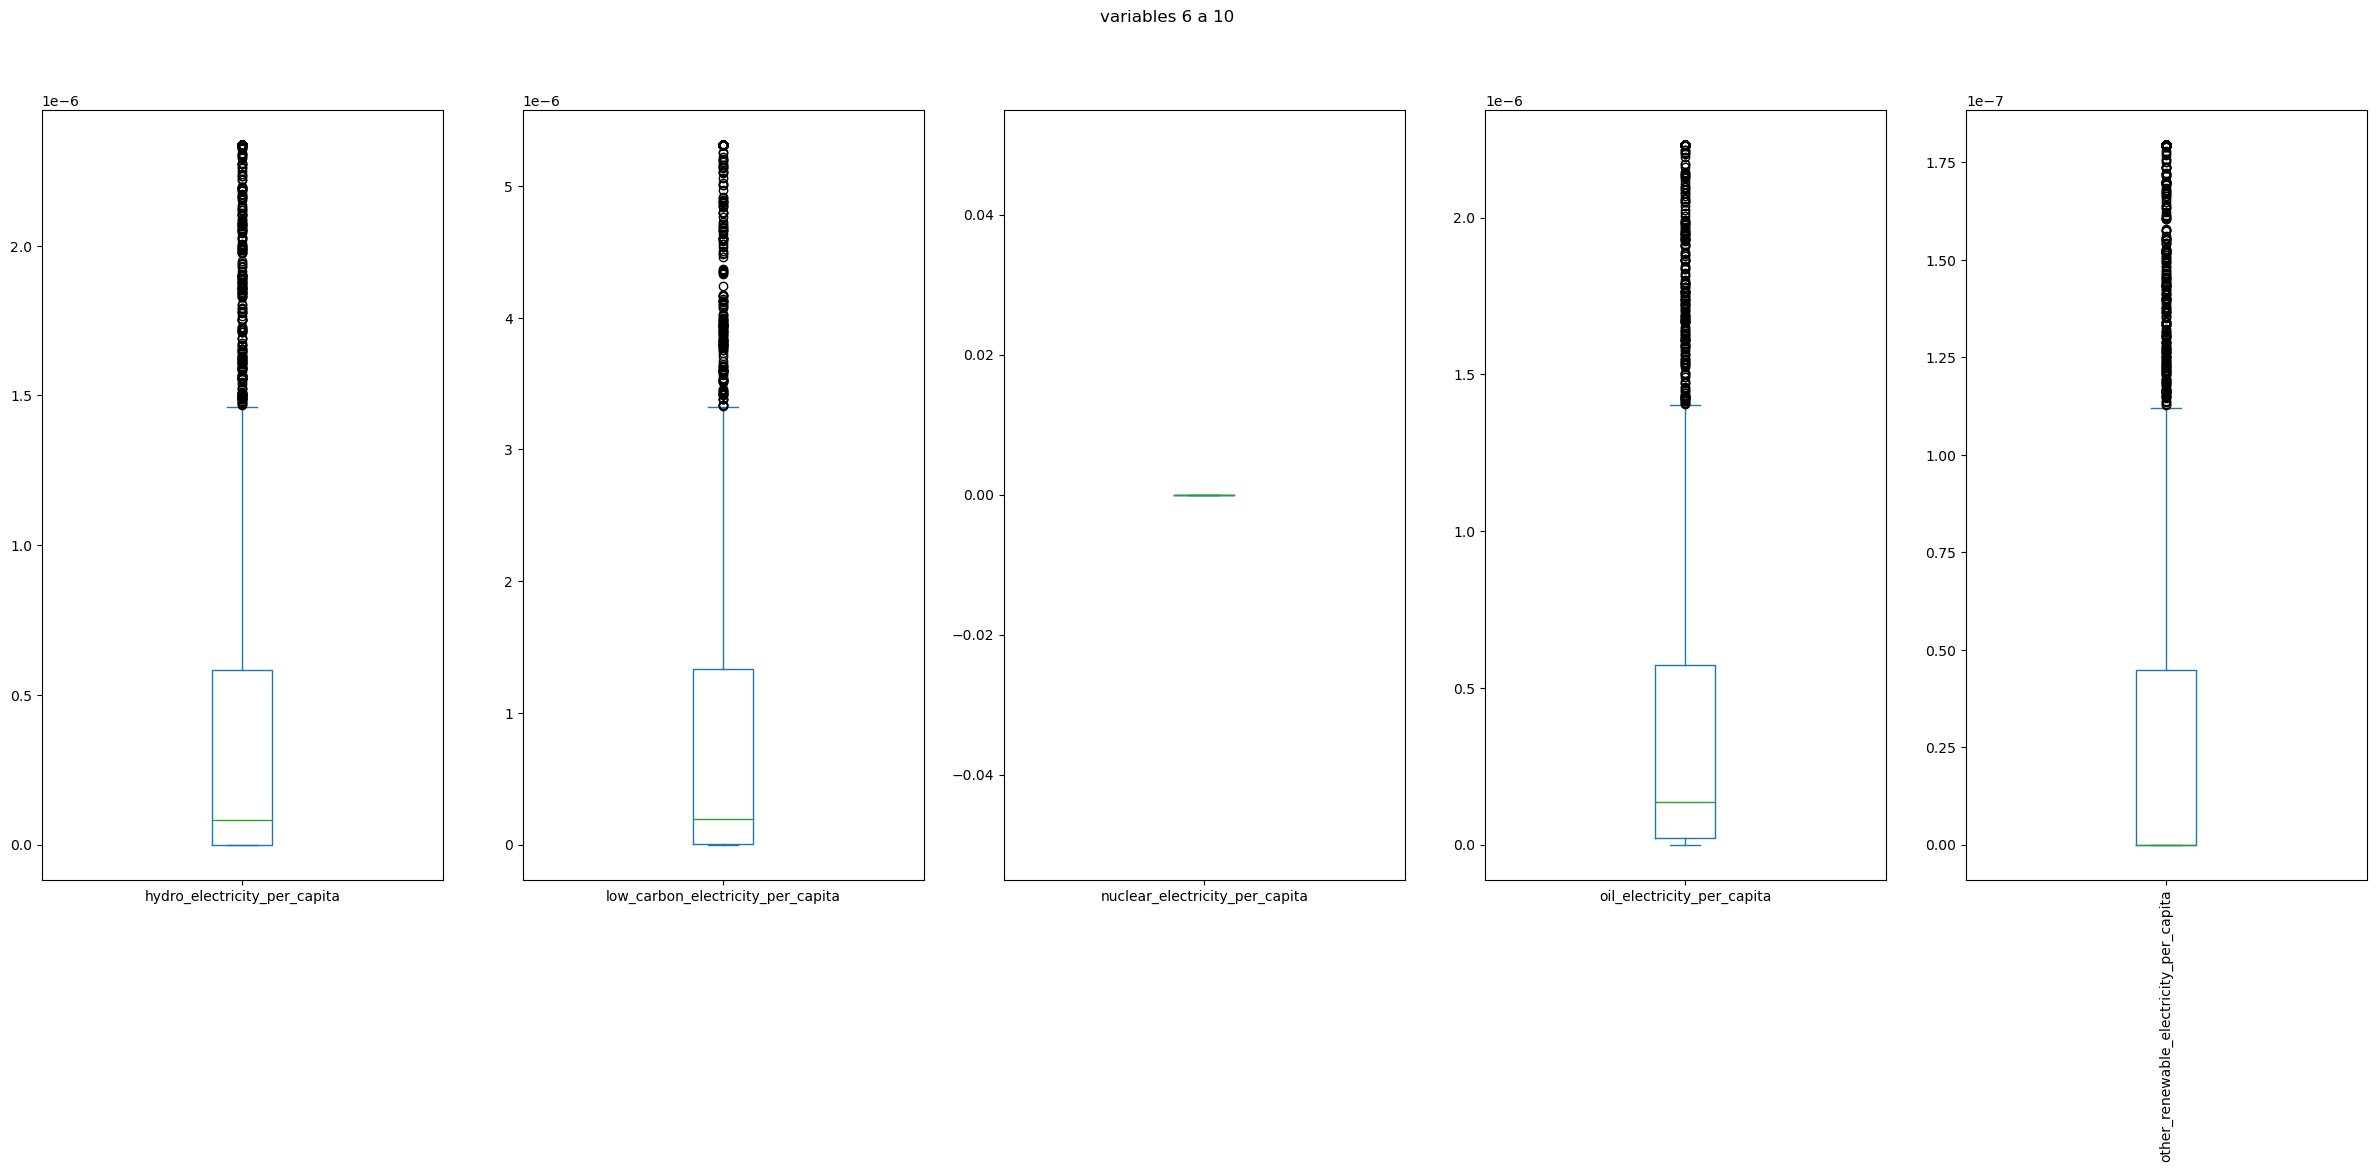

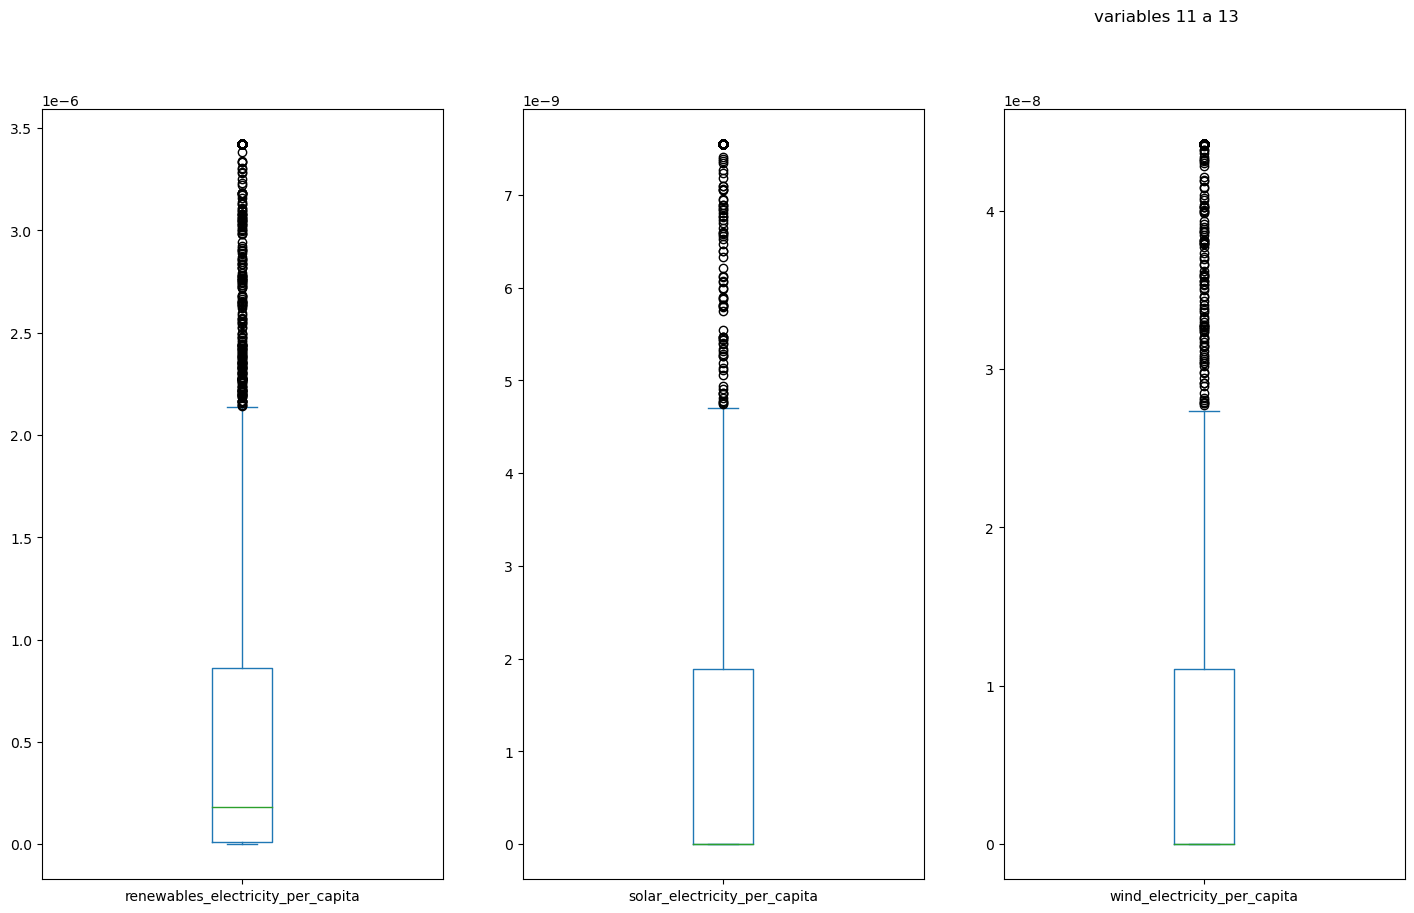

In [581]:
# verificamos las distribuciones de los datos después de tratamiento de outliers

#columnas numéricas
num_cols=df_transformado.select_dtypes(include='number').columns
# tamaño de la lote
batch_size=5

for i in range(0,len(num_cols),batch_size):
    cols_batch=num_cols[i:i+batch_size]
    df_transformado[cols_batch].plot(kind='box',subplots=True,layout=(1,batch_size), figsize=(30,10), sharex=False)
    plt.suptitle(f'variables {i+1} a {i+len(cols_batch)}')
    plt.xticks(rotation=90)
    plt.show()

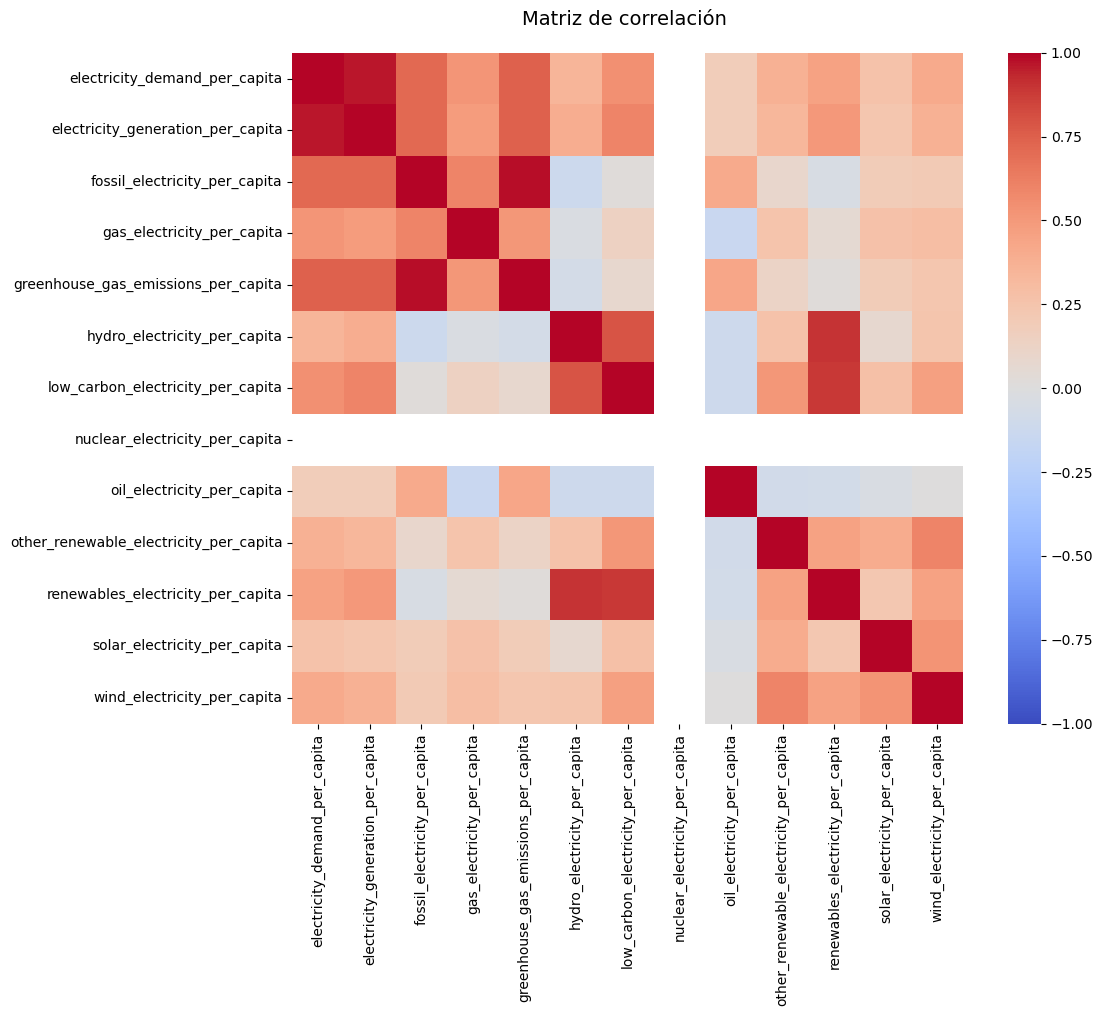

In [582]:
# --- Matriz de correlaciones ---
corr = df_transformado.corr(numeric_only=True)
# --- Plot mejorado ---
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap="coolwarm",
            vmin=-1, vmax=1,
            annot=False,
            cbar=True,
            square=True,
            )

plt.title("Matriz de correlación ", fontsize=14, pad=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [583]:
#Convertir a formato tabular (pares de variables)
corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlacion']

#Filtrar correlaciones altas
corr_pairs = corr_pairs[
    (corr_pairs['Variable_1'] != corr_pairs['Variable_2']) &
    (corr_pairs['Correlacion'].abs() > 0.7)
]

#Crear una clave ordenada para evitar duplicados tipo A–B / B–A
corr_pairs['Par'] = corr_pairs.apply(
    lambda x: '-'.join(sorted([x['Variable_1'], x['Variable_2']])), axis=1
)

#Eliminar duplicados usando esa clave
corr_pairs = corr_pairs.drop_duplicates(subset=['Par']).drop(columns='Par')

#Ordenar por correlación descendente
corr_pairs = corr_pairs.sort_values(by='Correlacion', ascending=False).reset_index(drop=True)
corr_pairs

,Variable_1,Variable_2,Correlacion
0,fossil_electricity_per_capita,greenhouse_gas_emissions_per_capita,0.98
1,electricity_demand_per_capita,electricity_generation_per_capita,0.96
2,hydro_electricity_per_capita,renewables_electricity_per_capita,0.91
3,low_carbon_electricity_per_capita,renewables_electricity_per_capita,0.89
4,hydro_electricity_per_capita,low_carbon_electricity_per_capita,0.79
5,electricity_generation_per_capita,greenhouse_gas_emissions_per_capita,0.75
6,electricity_demand_per_capita,greenhouse_gas_emissions_per_capita,0.74
7,electricity_demand_per_capita,fossil_electricity_per_capita,0.71
8,electricity_generation_per_capita,fossil_electricity_per_capita,0.71


## Transformación

In [584]:
df_final_escalado=df_transformado.copy()
num_cols = df_final_escalado.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_final_escalado[num_cols] = scaler.fit_transform(df_final_escalado[num_cols])

In [585]:
df_final_escalado

,country,year,electricity_demand_per_capita,electricity_generation_per_capita,fossil_electricity_per_capita,gas_electricity_per_capita,greenhouse_gas_emissions_per_capita,hydro_electricity_per_capita,low_carbon_electricity_per_capita,nuclear_electricity_per_capita,oil_electricity_per_capita,other_renewable_electricity_per_capita,renewables_electricity_per_capita,solar_electricity_per_capita,wind_electricity_per_capita
23,Afghanistan,2000,-0.84,-0.84,-0.77,-0.60,-0.78,-0.60,-0.63,0.00,-0.68,-0.59,-0.65,-0.59,-0.58
24,Afghanistan,2001,-0.84,-0.84,-0.77,-0.60,-0.79,-0.59,-0.62,0.00,-0.68,-0.59,-0.64,-0.59,-0.58
25,Afghanistan,2002,-0.84,-0.83,-0.77,-0.60,-0.79,-0.58,-0.62,0.00,-0.68,-0.59,-0.64,-0.59,-0.58
26,Afghanistan,2003,-0.84,-0.83,-0.76,-0.60,-0.78,-0.58,-0.62,0.00,-0.67,-0.59,-0.64,-0.59,-0.58
27,Afghanistan,2004,-0.84,-0.83,-0.76,-0.60,-0.78,-0.59,-0.62,0.00,-0.67,-0.59,-0.65,-0.59,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Zimbabwe,2017,-0.70,-0.72,-0.70,-0.60,-0.69,-0.24,-0.44,0.00,-0.69,-0.25,-0.37,-0.36,-0.58
6632,Zimbabwe,2018,-0.69,-0.70,-0.68,-0.60,-0.67,-0.15,-0.40,0.00,-0.68,-0.19,-0.30,-0.14,-0.58
6633,Zimbabwe,2019,-0.71,-0.71,-0.68,-0.60,-0.68,-0.24,-0.44,0.00,-0.68,-0.21,-0.37,0.07,-0.58
6634,Zimbabwe,2020,-0.71,-0.73,-0.69,-0.60,-0.69,-0.28,-0.46,0.00,-0.68,-0.24,-0.40,0.05,-0.58
